<a href="https://colab.research.google.com/github/fran-scala/qml-schwinger-model/blob/main/classical_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical NN

Classical NN training to check if there is overfitting also employing classical ML

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

## Dataset creation

In [52]:
symmetry = True
n_qubits = 8
threshold = 2

from dataset_generator import *

# v = generator(int(n_qubits/2),2)
# delta_l = Dealtal_calculation(v)

X = []
Y = []
np.random.seed(1234)
for i in range(10000):
    v = list(generator(int(n_qubits/2),int(i%4)))
    if v in X:
        pass
    else:
        v = [int(v[j]) for j in range(len(v))]
        X.append(v)
        if Dealtal_calculation(v)<threshold:
            Y.append(1)
        else:
            Y.append(0)
print(Y.count(0),Y.count(1))

24 45


In [33]:
np.random.seed(1234)
shuffle_indices = np.random.permutation(len(X))
train_size = int(len(X)*0.7)

train_indices = np.array(shuffle_indices[:train_size])
test_indices = np.array(shuffle_indices[train_size:])

x_train, y_train = np.take(X, train_indices, axis=0), np.take(Y, train_indices, axis=0)
x_test, y_test = np.take(X, test_indices, axis=0), np.take(Y, test_indices, axis=0)

x_train = np.array(x_train)
x_test = np.array(x_test)

for x,y in zip(x_train[:5, :], y_train[:5]):
    print(x,y)

print()

[1 0 0 1 0 0 1 1] 1
[0 0 1 1 1 1 1 1] 1
[0 1 0 0 1 0 0 0] 1
[0 0 1 1 1 0 0 1] 1
[1 1 1 1 0 1 1 0] 0



## Building the model

In [34]:
# keras imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation
from tensorflow.keras.utils import plot_model, set_random_seed
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [43]:
set_random_seed(111)

input_shape = 8
dropoutRate = 0.25 # WITH 0 DROPOUT OVERFITTING IS VERY EVIDENT

####
inputArray = Input(shape=(input_shape,))
#
x = Dense(64, activation='relu')(inputArray)
x = Dropout(dropoutRate)(x)
#
x = Dense(40, activation='relu')(x)
# x = Dropout(dropoutRate)(x)
# #
x = Dense(20)(x)
x = Activation('relu')(x)
# x = Dropout(dropoutRate)(x)
#
x = Dense(10, activation='relu')(x)
x = Dropout(dropoutRate)(x)
#
x = Dense(5, activation='relu')(x)
x = Dropout(dropoutRate)(x)
#
output = Dense(1, activation='sigmoid')(x)#'softmax'
####
model = Model(inputs=inputArray, outputs=output)

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_24 (Dense)            (None, 64)                576       
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 40)                2600      
                                                                 
 dense_26 (Dense)            (None, 20)                820       
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_27 (Dense)            (None, 10)                210 

In [45]:
batch_size = x_train.shape[0]
n_epochs = 100

# train
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(x_test, y_test),)
                # callbacks = [
                # EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                # ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                # TerminateOnNaN()])


Epoch 1/100
1/1 - 2s - loss: 0.6989 - val_loss: 0.6999 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.6945 - val_loss: 0.6982 - 41ms/epoch - 41ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7006 - val_loss: 0.6962 - 55ms/epoch - 55ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6928 - val_loss: 0.6936 - 59ms/epoch - 59ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6893 - val_loss: 0.6915 - 67ms/epoch - 67ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6926 - val_loss: 0.6898 - 61ms/epoch - 61ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6881 - val_loss: 0.6880 - 84ms/epoch - 84ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6993 - val_loss: 0.6863 - 69ms/epoch - 69ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6777 - val_loss: 0.6846 - 54ms/epoch - 54ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6955 - val_loss: 0.6820 - 58ms/epoch - 58ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6781 - val_loss: 0.6796 - 57ms/epoch - 57ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6881 - val_loss: 0.6777 - 54ms/epoch - 54ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6769 - va

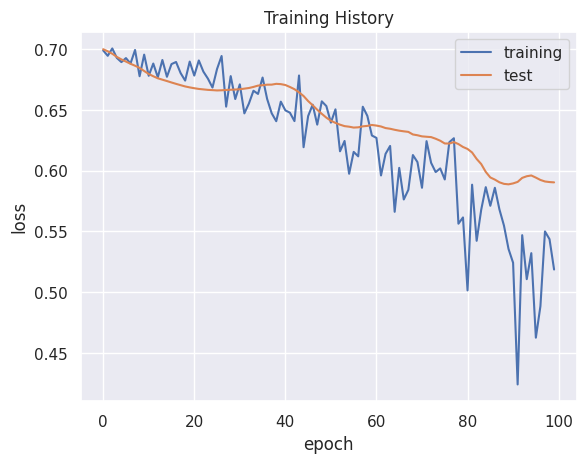

In [46]:
# PLOTTING HISTORY

# plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()



2/2 [==============================] - 0s 10ms/step
[1.772314   0.77231395 0.5448677  0.50496376 0.4931655  0.27226987]
1/1 [==============================] - 0s 28ms/step
[1.7651145  0.7651146  0.6091311  0.5948358  0.5870453  0.58234096
 0.41971964 0.41378152]


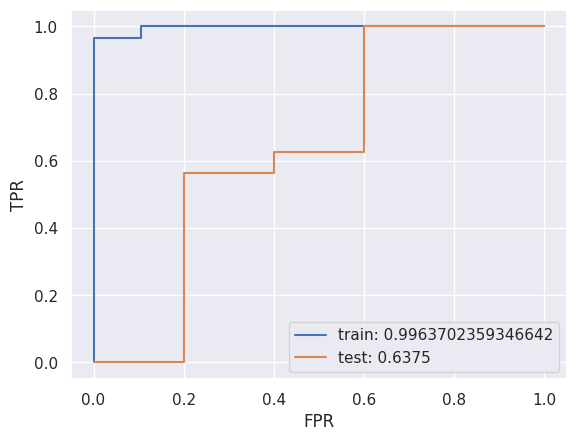

In [47]:
predict_train = model.predict(x_train)

fpr1, tpr1, threshold = roc_curve(y_train, predict_train)
print(threshold)

predict_test = model.predict(x_test)

fpr2, tpr2, threshold = roc_curve(y_test, predict_test)
print(threshold)
auc_ =  auc(fpr1, tpr1)
plt.plot(fpr1,tpr1,label=f'train: {auc_}')
auc_ =  auc(fpr2, tpr2)
plt.plot(fpr2,tpr2,label=f'test: {auc_}')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()

In [48]:
for i in zip(y_train[:20], predict_train[:20]):
  print(i)

(1, array([0.6615465], dtype=float32))
(1, array([0.6371631], dtype=float32))
(1, array([0.679512], dtype=float32))
(1, array([0.6061714], dtype=float32))
(0, array([0.32105798], dtype=float32))
(1, array([0.5448677], dtype=float32))
(0, array([0.4285158], dtype=float32))
(1, array([0.6889603], dtype=float32))
(1, array([0.7520683], dtype=float32))
(1, array([0.4931655], dtype=float32))
(0, array([0.3827186], dtype=float32))
(1, array([0.720867], dtype=float32))
(0, array([0.27226987], dtype=float32))
(1, array([0.6132145], dtype=float32))
(1, array([0.6860868], dtype=float32))
(1, array([0.65777147], dtype=float32))
(1, array([0.6921165], dtype=float32))
(0, array([0.31229702], dtype=float32))
(0, array([0.50496376], dtype=float32))
(0, array([0.3358692], dtype=float32))


In [49]:
accuracy_score(y_train, np.around(predict_train))

0.9375

In [50]:
accuracy_score(y_test, np.around(predict_test))

0.8095238095238095